In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats
import statsmodels.api as sm

pd.options.display.float_format = "{:.2f}".format

In [2]:
# Read case data
df = pd.read_excel("4. Case 3 - Two-sample t-test.xlsx")

In [3]:
df.head()

,Store Id,Display Type,Sales Volume
0,3846186,Old_display_type,2038.31
1,1083410,Old_display_type,2017.29
2,4278951,Old_display_type,1746.47
3,6670048,Old_display_type,2061.78
4,5054220,Old_display_type,2253.76


In [4]:
# Descriptive statistics for the 'Sales Volume' variable
df["Sales Volume"].describe()

count    100.00
mean    2051.04
std      277.43
min     1140.28
25%     1849.44
50%     2034.54
75%     2236.40
max     2716.07
Name: Sales Volume, dtype: float64

In [5]:
df.groupby("Display Type")["Store Id"].nunique()

Display Type
New_display_type    50
Old_display_type    50
Name: Store Id, dtype: int64

In [6]:
# Create arrays with units sold for 'Old_display_type' and 'New_display_type'
data_o = df[df["Display Type"] =="Old_display_type"]["Sales Volume"].values
data_n = df[df["Display Type"] =="New_display_type"]["Sales Volume"].values

In [7]:
# Mean sales for old and new display types
print("Mean Old: " + str(np.mean(data_o)))
print("Mean New: " + str(np.mean(data_n)))

Mean Old: 2002.4714000000001
Mean New: 2099.6049999999996


The sales volume with the new display (2099.60) is higher than that of the old display type (2002.47).

In [8]:
# Total old and new display type units sold
print("Sum Old: " + str(np.sum(data_o)))
print("Sum New: " + str(np.sum(data_n)))

Sum Old: 100123.57
Sum New: 104980.24999999999


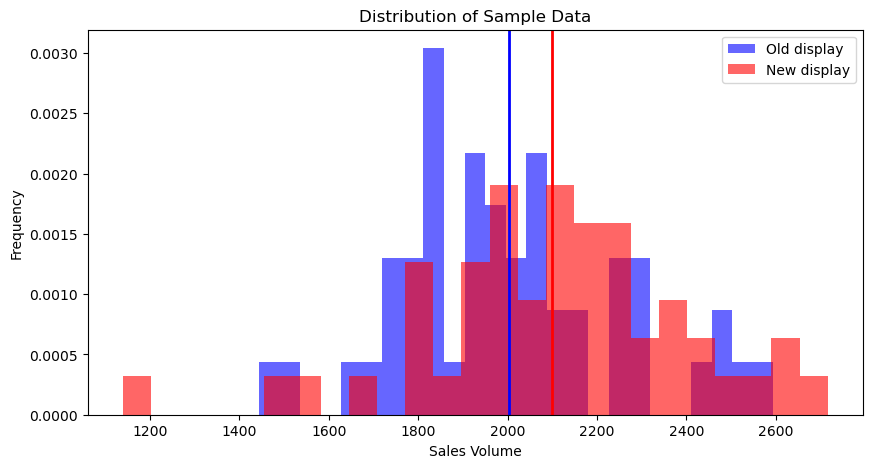

In [9]:
# Plot the histogram
plt.figure(figsize=(10,5))
plt.hist(data_o, bins=25, density=True, alpha=0.6, color='b', label ="Old display")
plt.hist(data_n, bins=25, density=True, alpha=0.6, color='r', label ="New display")

# Add the line for the mean of the old display data
plt.axvline(data_o.mean(), color='b', linestyle='solid', linewidth=2)

# Add the line for the mean of the new display data
plt.axvline(data_n.mean(), color='r', linestyle='solid', linewidth=2)

# Label axis and add title
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Data')

plt.legend()
plt.show()

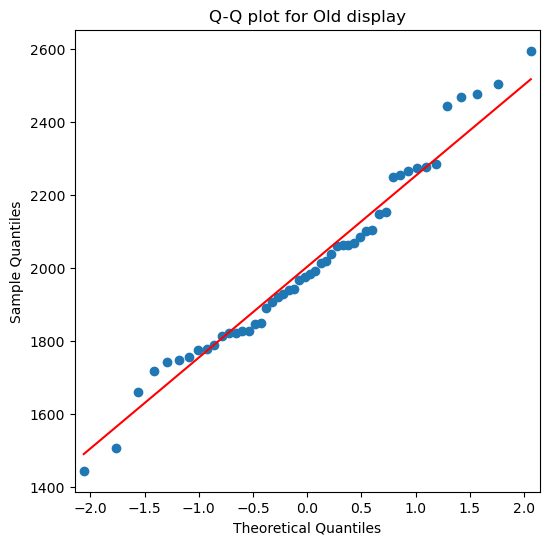

In [10]:
# Create Q-Q plot for the variable "Old display"
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data_o, line='s', ax=ax, fmt='b')

# Set the chart title and axis labels
ax.set_title("Q-Q plot for Old display")

# Display the chart
plt.show()

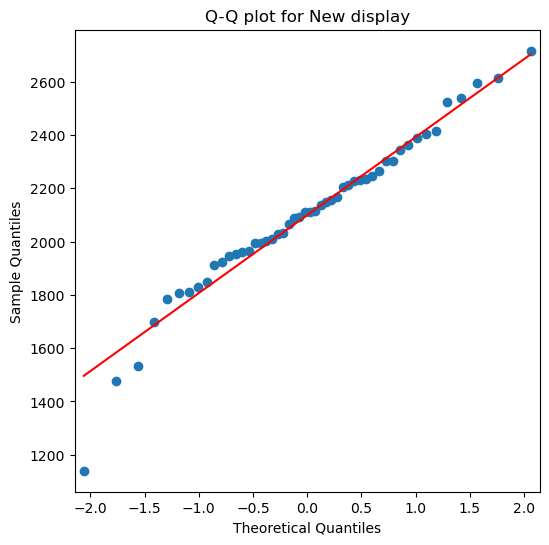

In [11]:
# Create Q-Q plot for the variable "New display"
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data_n, line='s', ax=ax, fmt='b')

# Set the chart title and axis labels
ax.set_title("Q-Q plot for New display")

# Display the chart
plt.show()

The Q-Q plot suggests that the dependent variables are approximately normally distributed.

In [12]:
# Shapiro-Wilk test
print("Old display: " + str(shapiro(data_o)))
print("New display: " + str(shapiro(data_n)))

Old display: ShapiroResult(statistic=0.9745520409829699, pvalue=0.3508105210464765)
New display: ShapiroResult(statistic=0.9707473113019827, pvalue=0.24816190928829607)


Since the p-values are greater than 0.05, it indicates that the data for both groups adhere to a normal distribution.

In [13]:
# Levene's test centered at the mean
print(stats.levene(data_o, data_n, center='mean'))

LeveneResult(statistic=0.402449870750646, pvalue=0.5273048920979523)


Additionally, because the p-value is above 0.05, we find that the variances in sales volumes for the two groups are statistically equivalent.

The null and alternative hypotheses are defined as follows:

- H0: µ(Sales_VolNew) - µ(Sales_VolOld) = 0
- H1: µ(Sales_VolNew) - µ(Sales_VolOld) > 0

We set the significance level, alpha, to 0.05.

In the two-sample t-test, we choose 'greater' to align with the alternative hypothesis—suggesting that the mean sales volume for the new display exceeds that of the old one.

In [14]:
# Run the two-sample t-test
stats.ttest_ind(data_n, data_o, equal_var=True, alternative = "greater")

TtestResult(statistic=1.7693132318181242, pvalue=0.039976188061622175, df=98.0)

With a p-value of 0.0400  (below the 0.05 significance level), we reject the null hypothesis in favor of the alternative.

Therefore, we have sufficient evidence to assert that the new display type significantly outperforms the old one in sales volume at the 0.05 significance level.